In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.cm as cm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

In [2]:
df = pd.read_csv('YPCCC_State_n28_2015Jan5-renewablesdata3.csv')
df.head()


,Statecode,Statename,TotalPop,supportRPS_PredPop,supportRPS,supportRPSOppose_PredPop,supportRPSOppose,fundrenewables_PredPop,fundrenewables,fundrenewablesOppose_PredPop,fundrenewablesOppose,futuregen_PredPop,futuregen,futuregenOppose_PredPop,futuregenOppose,Renewable_portfolio_standard,Renewable_portfolio_goal,Solar_PPA_yn,Net_metering_yn
0,AK,Alaska,447543,231533,52,209611,47,340502,76,103875,23,245072,55,146537,33,0,0,0,1
1,AL,Alabama,3166424,1729461,55,1404350,44,2309285,73,836219,26,1693632,53,949324,30,0,0,0,0
2,AR,Arkansas,1921039,1084748,56,816588,43,1403990,73,492998,26,1058621,55,568292,30,0,0,0,1
3,AZ,Arizona,4149955,2549023,61,1561281,38,3138582,76,936419,23,2512113,61,1071469,26,1,0,1,1
4,CA,California,24117317,15895453,66,7678247,32,19004090,79,4613049,19,16880034,70,4528428,19,1,0,1,1


In [3]:
df.set_index('Statename', inplace=True) 

In [14]:
states_abbrev = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

#adapted from  https://github.com/dataiap/dataiap/blob/master/resources/util/map_util.py

#load in state geometry
from collections import defaultdict
import json
state2poly = defaultdict(list)

data = json.load(file("us-states.json"))
for f in data['features']:
    state = states_abbrev[f['id']]
    geo = f['geometry']
    if geo['type'] == 'Polygon':
        for coords in geo['coordinates']:
            state2poly[state].append(coords)
    elif geo['type'] == 'MultiPolygon':
        for polygon in geo['coordinates']:
            state2poly[state].extend(polygon)

            
def draw_state(plot, stateid, **kwargs):
    """
    draw_state(plot, stateid, color=..., **kwargs)
    
    Automatically draws a filled shape representing the state in
    subplot.
    The color keyword argument specifies the fill color.  It accepts keyword
    arguments that plot() accepts
    """
    for polygon in state2poly[stateid]:
        xs, ys = zip(*polygon)
        plot.fill(xs, ys, **kwargs)

        
def make_map(states, label, comap):
    """
    Draw a cloropleth map, that maps data onto the United States
    
    Inputs
    -------
    states : Column of a DataFrame
        The value for each state, to display on a map
    label : str
        Label of the color bar

    Returns
    --------
    The map
    """
    fig = plt.figure(figsize=(12, 9))
    ax = plt.gca()

    if states.max() < 2: # colormap for election probabilities 
        cmap = cm.RdBu
        vmin, vmax = 0, 1
    else:  # colormap for electoral votes
        cmap = comap
        vmin, vmax = 0, states.max()
    norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
    
    skip = set(['National', 'District of Columbia', 'Guam', 'Puerto Rico',
                'Virgin Islands', 'American Samoa', 'Northern Mariana Islands'])
    for state in states_abbrev.values():
        if state in skip:
            continue
        color = cmap(norm(states.ix[state]))
        draw_state(ax, state, color = color, ec='k')

    #add an inset colorbar
    ax1 = fig.add_axes([0.45, 0.70, 0.4, 0.02])    
    cb1=mpl.colorbar.ColorbarBase(ax1, cmap=cmap,
                                  norm=norm,
                                  orientation='horizontal')
    ax1.set_title(label)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlim(-180, -60)
    ax.set_ylim(15, 75)
    sns.despine(left=True, bottom=True)
    return ax



In [5]:
df.head()

,Statecode,TotalPop,supportRPS_PredPop,supportRPS,supportRPSOppose_PredPop,supportRPSOppose,fundrenewables_PredPop,fundrenewables,fundrenewablesOppose_PredPop,fundrenewablesOppose,futuregen_PredPop,futuregen,futuregenOppose_PredPop,futuregenOppose,Renewable_portfolio_standard,Renewable_portfolio_goal,Solar_PPA_yn,Net_metering_yn
Statename,,,,,,,,,,,,,,,,,,
Alaska,AK,447543,231533,52,209611,47,340502,76,103875,23,245072,55,146537,33,0,0,0,1
Alabama,AL,3166424,1729461,55,1404350,44,2309285,73,836219,26,1693632,53,949324,30,0,0,0,0
Arkansas,AR,1921039,1084748,56,816588,43,1403990,73,492998,26,1058621,55,568292,30,0,0,0,1
Arizona,AZ,4149955,2549023,61,1561281,38,3138582,76,936419,23,2512113,61,1071469,26,1,0,1,1
California,CA,24117317,15895453,66,7678247,32,19004090,79,4613049,19,16880034,70,4528428,19,1,0,1,1


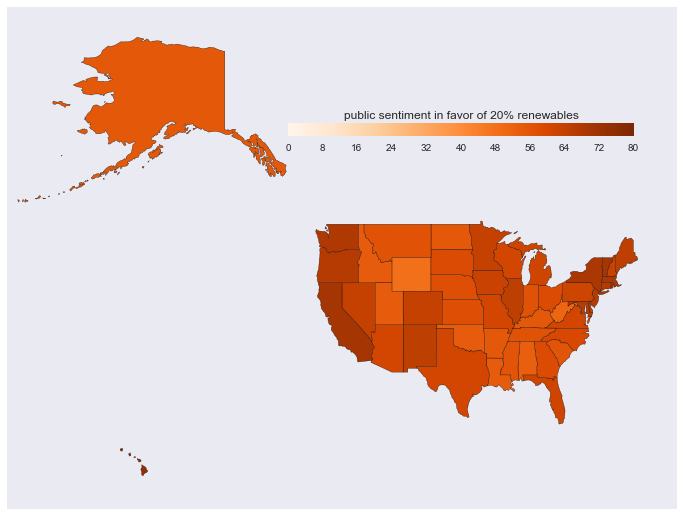

In [17]:
make_map(df['futuregen'], "public sentiment in favor of 20% renewables", mycmap)


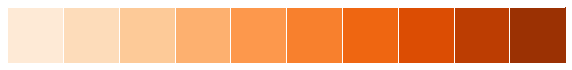

In [16]:
mycmap = sns.choose_colorbrewer_palette('sequential', as_cmap=True)